In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [19]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['Category'] = iris.target

df


,sepal length,sepal width,petal length,petal width,Category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Category        0
dtype: int64

In [21]:
df['Category'] = df['Category'].replace({0:'setosa', 1:'versicolor' , 2:'virginica'})

In [22]:
numeric_columns = df.select_dtypes(include='number').columns
print(f'Numeric columns , {numeric_columns}')

categorical_columns = df.select_dtypes(include='category').columns
print(f'Categorical columns , {categorical_columns}')


Numeric columns , Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
Categorical columns , Index([], dtype='object')


Text(0.5, 1.0, 'Histogram of Petal Length')

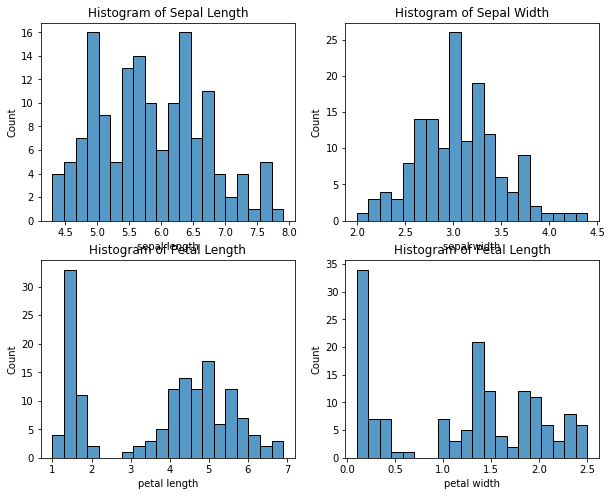

In [23]:
fig,axes = plt.subplots(2,2,figsize = (10,8))
sns.histplot(data = df,x = 'sepal length', bins=20,ax = axes[0,0])
axes[0,0].set_title("Histogram of Sepal Length")

sns.histplot(data = df, x = 'sepal width' , bins=20 , ax = axes[0,1])
axes[0,1].set_title("Histogram of Sepal Width")

sns.histplot(data = df, x = 'petal length' ,bins = 20, ax = axes[1,0])
axes[1,0].set_title("Histogram of Petal Length")

sns.histplot(data = df, x = 'petal width' , bins= 20, ax = axes[1,1])
axes[1,1].set_title("Histogram of Petal Length")


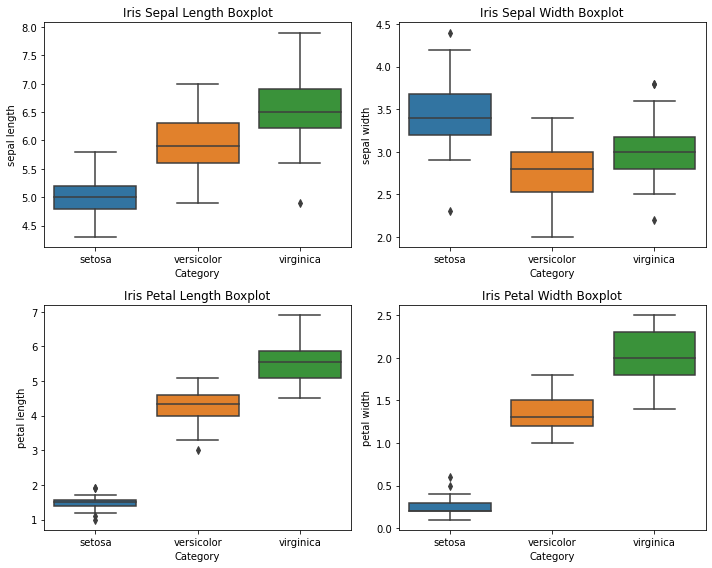

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, x='Category', y='sepal length', ax=axes[0, 0])
axes[0, 0].set_title('Iris Sepal Length Boxplot')

sns.boxplot(data=df, x='Category', y='sepal width', ax=axes[0, 1])
axes[0, 1].set_title('Iris Sepal Width Boxplot')

sns.boxplot(data=df, x='Category', y='petal length', ax=axes[1, 0])
axes[1, 0].set_title('Iris Petal Length Boxplot')

sns.boxplot(data=df, x='Category', y='petal width', ax=axes[1, 1])
axes[1, 1].set_title('Iris Petal Width Boxplot')

plt.tight_layout()

plt.show()

In [25]:
numerical_df = df.select_dtypes(include=['int64','float64'])
q1 = numerical_df.quantile(0.25)
q3 = numerical_df.quantile(0.75)

IQR = q3-q1

In [26]:
swq1 = df['sepal width'].quantile(0.25)
swq3 = df['sepal width'].quantile(0.75)

sw_iqr = swq3-swq1

sw_lb = swq1-1.5*sw_iqr
sw_ub = swq3 + 1.5*sw_iqr

sw_outliers = df[(df['sepal width']<sw_lb) | (df['sepal width']>sw_ub)]

print(f"Sepal width outliers: \n{sw_outliers}")


slq1 = df['sepal length'].quantile(0.25)
slq3 = df['sepal length'].quantile(0.75)

sl_iqr = slq3 - slq1

sl_lb = slq1 - 1.5*sl_iqr
sl_ub = slq3 + 1.5*sl_iqr

sl_outliers = df[(df['sepal length']<sl_lb) | (df['sepal length']>sl_ub)]

print(f"Sepal Length outliers: \n{sl_outliers}")


pwq1 = df['petal width'].quantile(0.25)
pwq3 = df['petal width'].quantile(0.75)

pw_iqr = pwq3-pwq1

pw_lb = pwq1-1.5*pw_iqr
pw_ub = pwq3 + 1.5*pw_iqr

pw_outliers = df[(df['petal width']<pw_lb) | (df['petal width']>pw_ub)]

print(f"Petal width outliers: \n{pw_outliers}")



plq1 = df['petal length'].quantile(0.25)
plq3 = df['petal length'].quantile(0.75)

pl_iqr = plq3 - plq1

pl_lb = plq1 - 1.5*pl_iqr
pl_ub = plq3 + 1.5*pl_iqr
pl_outliers = df[(df['petal length']<pl_lb) | (df['petal length']> pl_ub)]

print(f'Petal length outliers: \n{pl_outliers}')


Sepal width outliers: 
    sepal length  sepal width  petal length  petal width    Category
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor
Sepal Length outliers: 
Empty DataFrame
Columns: [sepal length, sepal width, petal length, petal width, Category]
Index: []
Petal width outliers: 
Empty DataFrame
Columns: [sepal length, sepal width, petal length, petal width, Category]
Index: []
Petal length outliers: 
Empty DataFrame
Columns: [sepal length, sepal width, petal length, petal width, Category]
Index: []


<AxesSubplot:xlabel='petal width', ylabel='sepal width'>

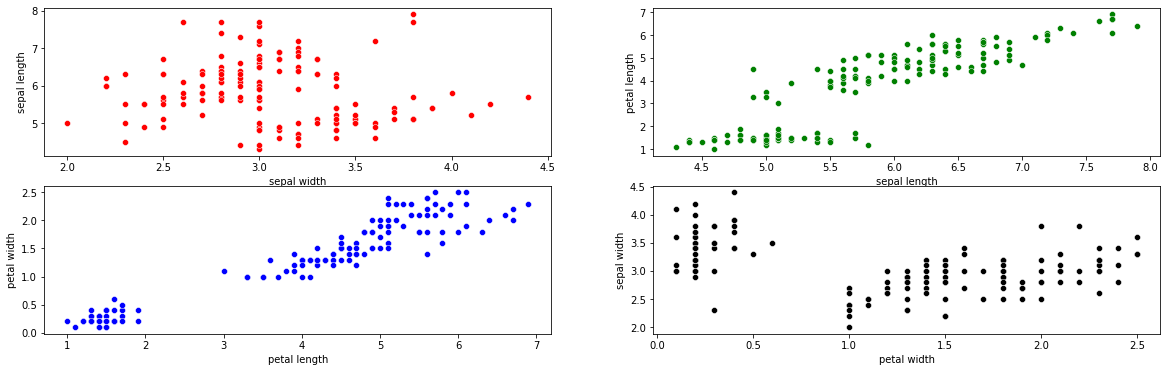

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal width",y="sepal length",color='red',data=df)
plt.subplot(2, 2, 2)
sns.scatterplot(x="sepal length",y="petal length",color='green',data=df)
plt.subplot(2, 2, 3)
sns.scatterplot(x="petal length",y="petal width",color='blue',data=df)
plt.subplot(2, 2, 4)
sns.scatterplot(x="petal width",y="sepal width",color='black',data=df)

Conclusion -- 

From the above dataset and visualization done on it , we can draw following conclusions from it 
    1. Speal width data is normally distributed , data of other features is skewed either left or right.
    2. Most of the flowers have sepal width as 3.0 mm
    3. Most of the iris flowers have petal width 0.2